In [ ]:
print("Hello, world")

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
print("using", device, "device")

In [ ]:
import time

matrix_size = 32*512

x = torch.randn(matrix_size, matrix_size)
y = torch.randn(matrix_size, matrix_size)

print("************ CPU SPEED ***************")
start = time.time()
result = torch.matmul(x,y)
print(time.time() - start)
print("verify device:", result.device)

x_gpu = x.to(device)
y_gpu = y.to(device)
torch.cuda.synchronize()

for i in range(3):
    print("************ GPU SPEED ***************")
    start = time.time()
    result_gpu = torch.matmul(x_gpu,y_gpu)
    torch.cuda.synchronize()
    print(time.time() - start)
    print("verify device:", result_gpu.device)

Epoch 0, Loss: 247.17673093585063
Epoch 1000, Loss: 2.0636752696560925
Epoch 2000, Loss: 0.7405689528846697
Epoch 3000, Loss: 0.3951438060347981
Epoch 4000, Loss: 0.26793156439198074
Epoch 5000, Loss: 0.19538340572412116
Epoch 6000, Loss: 0.1477944870816136
Epoch 7000, Loss: 0.11519585091034912
Epoch 8000, Loss: 0.09233577971158254
Epoch 9000, Loss: 0.07587171149257779


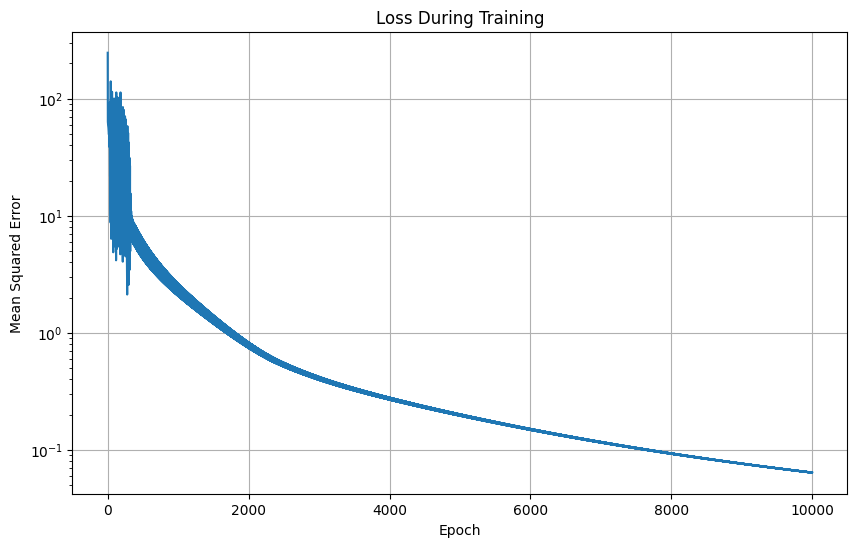

75 UAH ≈ 1.96 USD


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class DeepNeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = [np.random.randn(y, x) / np.sqrt(x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.zeros((y, 1)) for y in layer_sizes[1:]]
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward(self, X):
        self.activations = [X]
        self.zs = []
        for w, b in zip(self.weights[:-1], self.biases[:-1]):
            z = np.dot(w, self.activations[-1]) + b
            self.zs.append(z)
            self.activations.append(self.sigmoid(z))
        self.zs.append(np.dot(self.weights[-1], self.activations[-1]) + self.biases[-1])
        self.activations.append(self.zs[-1])
        return self.activations[-1]

    def backward(self, X, y, learning_rate):
        m = X.shape[1]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b = [np.zeros(b.shape) for b in self.biases]

        delta = (self.activations[-1] - y)
        nabla_w[-1] = np.dot(delta, self.activations[-2].T) / m
        nabla_b[-1] = np.sum(delta, axis=1, keepdims=True) / m

        for l in range(2, self.num_layers):
            delta = np.dot(self.weights[-l+1].T, delta) * self.sigmoid_derivative(self.zs[-l])
            nabla_w[-l] = np.dot(delta, self.activations[-l-1].T) / m
            nabla_b[-l] = np.sum(delta, axis=1, keepdims=True) / m

        self.weights = [w - learning_rate * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - learning_rate * nb for b, nb in zip(self.biases, nabla_b)]

    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean((output - y) ** 2)
            self.loss_history.append(loss)
            if i % 1000 == 0:
                print(f"Epoch {i}, Loss: {loss}")

    def predict(self, X):
        return self.forward(X)

    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history)
        plt.title('Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.yscale('log')
        plt.grid(True)
        plt.show()

# Підготовка даних
X = np.array([[i for i in range(1000)]])  # Сума в UAH
y = X / 37  # Відповідна сума в USD

# Нормалізація даних
X_norm = X / 100

# Створення та навчання моделі
model = DeepNeuralNetwork([1, 32, 32, 32, 1])
model.train(X_norm, y, epochs=10000, learning_rate=0.1)

# Візуалізація процесу навчання
model.plot_loss()

# Тестування моделі
test_input = np.array([[75]])
test_input_norm = test_input / 100
predicted_usd = model.predict(test_input_norm)
print(f"{test_input[0][0]} UAH ≈ {predicted_usd[0][0]:.2f} USD")

In [2]:
# Тестування моделі
test_input = np.array([[100]])
test_input_norm = test_input / 100
predicted_usd = model.predict(test_input_norm)
print(f"{test_input[0][0]} UAH ≈ {predicted_usd[0][0]:.2f} USD")

100 UAH ≈ 2.66 USD


In [6]:
print(model.activations)

[array([[1.]]), array([[0.99990471],
       [0.85508571],
       [0.0529748 ],
       [0.01201999],
       [0.71706732],
       [0.01159569],
       [0.01057472],
       [0.01477379],
       [0.92621679],
       [0.00328354],
       [0.20398057],
       [0.99742608],
       [0.95469579],
       [0.00461215],
       [0.20892031],
       [0.48592241],
       [0.32319913],
       [0.94398914],
       [0.00536028],
       [0.00742822],
       [0.97497409],
       [0.88842047],
       [0.00734226],
       [0.01608516],
       [0.25386206],
       [0.00166765],
       [0.83093036],
       [0.00643052],
       [0.33191795],
       [0.98810945],
       [0.36643564],
       [0.14383106]]), array([[3.22897072e-02],
       [7.05033073e-04],
       [2.48623062e-02],
       [4.52053180e-01],
       [1.92637823e-12],
       [4.95735403e-02],
       [9.26467216e-01],
       [8.70904961e-02],
       [1.87221963e-01],
       [1.12466181e-04],
       [4.08141060e-08],
       [9.38665056e-01],
       [9.